In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import shuffle
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [3]:
# Load dataset 
iris = load_iris()
X = iris.data
y = iris.target 
N = X.shape[0]
# Targets:
# 0: Setosa 
# 1: Versicolour
# 2: Virginica

# Features:
# 0: Sepal Length
# 1: Sepal Width
# 2: Petal Length
# 3: Petal Width

Text(0, 0.5, 'Percentage of Dataset')

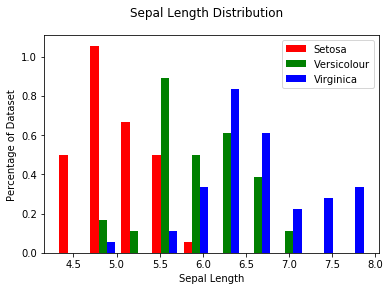

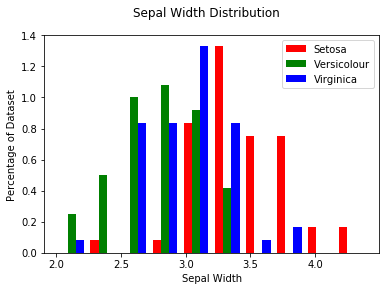

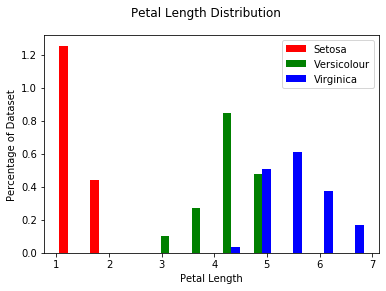

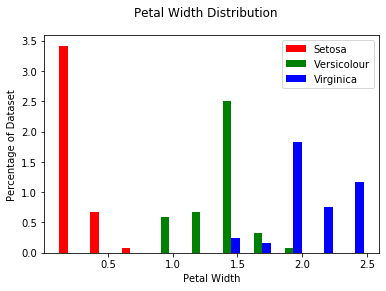

In [4]:
# Basic data exploration
# Plot distribution of y with each feature
Setosa = X[:50]
Versicolour = X[50:100]
Virginica = X[100:150]

colors = ['red', 'green', 'blue']
labels = ['Setosa', 'Versicolour', 'Virginica']
# Sepal Length 
plt.figure()
sepalLens = np.stack(\
    (Setosa[:,0], Versicolour[:,0], Virginica[:,0]),axis=1)
numBins = 10
plt.hist(\
    sepalLens, numBins, histtype='bar', density=True, color=colors, label=labels)
plt.legend()
plt.suptitle("Sepal Length Distribution")
plt.xlabel("Sepal Length")
plt.ylabel("Percentage of Dataset")

# Sepal Width 
plt.figure()
sepalWidths = np.stack(\
    (Setosa[:,1], Versicolour[:,1], Virginica[:,1]),axis=1)
numBins = 10
plt.hist(\
    sepalWidths, numBins, histtype='bar', density=True, color=colors, label=labels)
plt.legend()
plt.suptitle("Sepal Width Distribution")
plt.xlabel("Sepal Width")
plt.ylabel("Percentage of Dataset")

# Petal Length 
plt.figure()
petalLens = np.stack(\
    (Setosa[:,2], Versicolour[:,2], Virginica[:,2]),axis=1)
numBins = 10
plt.hist(\
    petalLens, numBins, histtype='bar', density=True, color=colors, label=labels)
plt.legend()
plt.suptitle("Petal Length Distribution")
plt.xlabel("Petal Length")
plt.ylabel("Percentage of Dataset")

# Petal Width 
plt.figure()
petalWidths = np.stack(\
    (Setosa[:,3], Versicolour[:,3], Virginica[:,3]),axis=1)
numBins = 10
plt.hist(\
    petalWidths, numBins, histtype='bar', density=True, color=colors, label=labels)
plt.legend()
plt.suptitle("Petal Width Distribution")
plt.xlabel("Petal Width")
plt.ylabel("Percentage of Dataset")

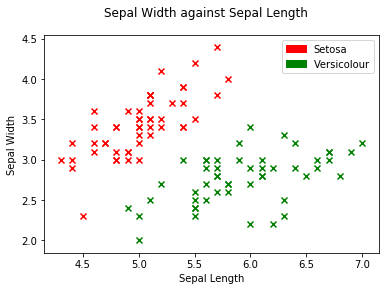

In [5]:
# Reduced problem:
# Classification: Iris Setosa or Iris Versicolour 
# Consider only Sepal Length and Sepal Width 
XRed = X[:100,0:2]
yRed = y[:100] 

# Scatter plot with sepal length and width 
def genScatter(f1, f2, y, f1Label, f2Label, title, yLabels, colors): 
    plt.figure()
    numPoints = f1.shape[0]
    for i in range(0, numPoints):
        plt.scatter(f1[i], f2[i], marker='x', color=colors[y[i]])
    plt.suptitle(title)
    plt.xlabel(f1Label)
    plt.ylabel(f2Label)
    legendElements = [
        Patch(facecolor=colors[0], edgecolor=colors[0],\
             label=yLabels[0]),
        Patch(facecolor=colors[1], edgecolor=colors[1],\
             label=yLabels[1])
    ]
    plt.legend(handles=legendElements)
genScatter(XRed[:,0], XRed[:,1], yRed, "Sepal Length", "Sepal Width", "Sepal Width against Sepal Length", labels, colors)

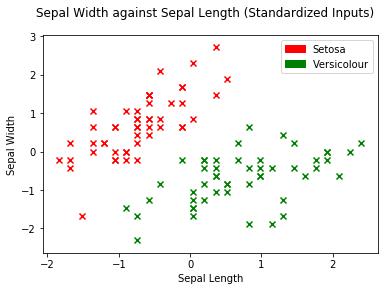

In [6]:
# Scale inputs (Reduced problem)
scaledXRed = scale(XRed)
# Plot of standardized input 
genScatter(scaledXRed[:,0], scaledXRed[:,1], yRed,\
    "Sepal Length", "Sepal Width", "Sepal Width against Sepal Length (Standardized Inputs)", labels, colors)

In [7]:
# Graph generation method
def generateGraph(variable, trainScoresMean, testScoresMean,\
    trainScoresStd, testScoresStd,\
    xLabel, yLabel, title, log=False):
    plt.figure()
    if log is False:
        plt.plot(variable, trainScoresMean, "-o", color="blue",\
            label="Training Accuracy")
        plt.plot(variable, testScoresMean, "-o", color="red",\
            label="Cross-Validation Accuracy")
    else: 
        plt.semilogx(variable, trainScoresMean, "-o",\
            color="blue", label="Training Accuracy")
        plt.semilogx(variable, testScoresMean, "-o",\
            color="red", label="Cross-Validation Accuracy")
    plt.fill_between(variable, trainScoresMean-trainScoresStd,\
        trainScoresMean+trainScoresStd, alpha=0.1, color="blue")
    plt.fill_between(variable, testScoresMean-testScoresStd,\
        testScoresMean+testScoresStd, alpha=0.1, color="red")
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.title(title)
    plt.legend(loc="lower right")

In [8]:
def plotDecisionBinary(estimator,f1, f2, y,\
    f1Name, f2Name, title):
    coefs = estimator.coef_[0]
    w0 = estimator.intercept_[0]
    w1 = coefs[0]
    w2 = coefs[1]
    intercept = - w0 / w2 
    slope = - w1 / w2 
    # Get line boundaries 
    lineXMin = np.amin(f1)
    lineXMax = np.amax(f1)
    lineX = np.linspace(lineXMin, lineXMax)
    lineY = slope * lineX + intercept
    # Plot points 
    plt.figure()
    for i in range(0,f1.shape[0]):
        plt.plot(f1[i], f2[i], "x", color=colors[y[i]])
    plt.plot(lineX, lineY, 'k')
    plt.xlim(lineXMin - 1, lineXMax + 1)
    # Set window y boundaries 
    lineYMin = np.amin(f2)
    lineYMax = np.amax(f2)
    plt.ylim(lineYMin - 1, lineYMax + 1)
    plt.xlabel(f1Name)
    plt.ylabel(f2Name)
    plt.suptitle(title)
    legendElements = [\
    Patch(facecolor=colors[0], edgecolor=colors[0],\
         label=labels[0]),\
    Patch(facecolor=colors[1], edgecolor=colors[1],\
         label=labels[1]),
    ]
    plt.legend(handles=legendElements)

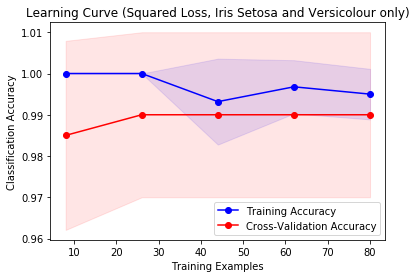

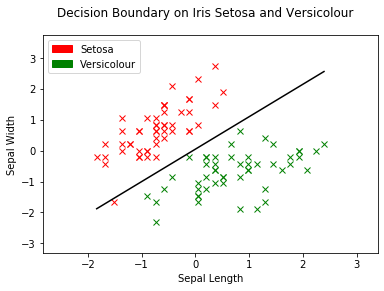

In [9]:
# A Basic Linear Classifier (Reduced problem)
estimator = SGDClassifier(loss="squared_loss", penalty="none",\
    max_iter=10000, shuffle=True, tol=None, learning_rate="constant",\
    eta0=0.01)
# Random permutation cross-validator
cv = ShuffleSplit(n_splits=10, test_size=0.20)
# Learning curve 
trainSizes, trainScores, testScores = learning_curve(\
    estimator, scaledXRed, yRed, train_sizes=np.linspace(0.1,1.0,5),\
    cv=cv, scoring="accuracy")

trainScoresMean = np.mean(trainScores, axis=1)
testScoresMean = np.mean(testScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
testScoresStd = np.std(testScores, axis=1)

# Plot learning curve 
generateGraph(trainSizes, trainScoresMean, testScoresMean,\
    trainScoresStd, testScoresStd,\
    "Training Examples", "Classification Accuracy",\
    "Learning Curve (Squared Loss, Iris Setosa and Versicolour only)")
# Plot decision boundary 
plotDecisionBinary(estimator.fit(scaledXRed,yRed),\
    scaledXRed[:,0], scaledXRed[:,1], yRed,\
    "Sepal Length", "Sepal Width",\
    "Decision Boundary on Iris Setosa and Versicolour")

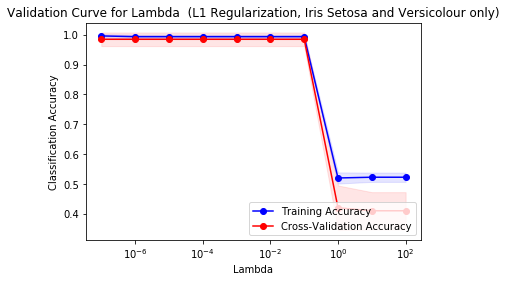

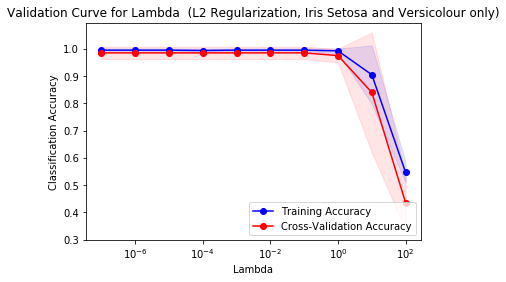

In [10]:
# L1 and L2 regularization (Reduced)
# Effect of varying lambda values
# Set of lamba values to test 
alphas = np.logspace(-7,2,10)

# L1 regularization
l1EstimatorRed = SGDClassifier(loss="squared_loss", penalty="l1",\
    max_iter=10000, shuffle=True, tol=None, learning_rate="constant",\
    eta0=0.01)
# Use the same cross validation method (cv)
# Calculate validation curve
trainScores, testScores = validation_curve(l1EstimatorRed, scaledXRed, yRed,\
    "alpha", alphas, cv=cv)

trainScoresMean = np.mean(trainScores, axis=1)
testScoresMean = np.mean(testScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
testScoresStd = np.std(testScores, axis=1)

# Graph
generateGraph(alphas, trainScoresMean, testScoresMean,\
    trainScoresStd, testScoresStd,\
    "Lambda", "Classification Accuracy",\
    "Validation Curve for Lambda  (L1 Regularization, Iris Setosa and Versicolour only)", True)

# L1 regularization
l2EstimatorRed = SGDClassifier(loss="squared_loss", penalty="l2",\
    max_iter=10000, shuffle=True, tol=None, learning_rate="constant",\
    eta0=0.01)
# Use the same cross validation method (cv)
# Calculate validation curve
trainScores, testScores = validation_curve(l2EstimatorRed, scaledXRed, yRed,\
    "alpha", alphas, cv=cv)

trainScoresMean = np.mean(trainScores, axis=1)
testScoresMean = np.mean(testScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
testScoresStd = np.std(testScores, axis=1)

# Graph
generateGraph(alphas, trainScoresMean, testScoresMean,\
    trainScoresStd, testScoresStd,\
    "Lambda", "Classification Accuracy",\
    "Validation Curve for Lambda  (L2 Regularization, Iris Setosa and Versicolour only)", True)

Text(0.5, 1.0, 'Weights against Lamba (L2 Regularization, Iris Setosa and Versicolour only)')

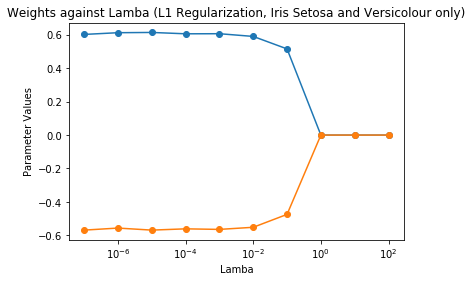

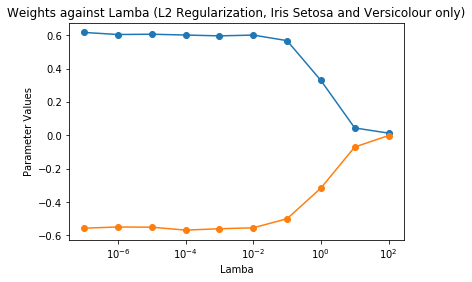

In [11]:
# Plotting the weights of the regularized models 
# lambas to test: alphas
numWeights = 2 
# L1
weights = np.zeros((alphas.shape[0], numWeights))
for i in range(0,alphas.shape[0]): 
    l1EstVaryAlph = SGDClassifier(loss="squared_loss", penalty="l1",\
        max_iter=10000, shuffle=True, tol=None, learning_rate="constant",\
        eta0=0.01, alpha=alphas[i])
    l1EstVaryAlph.fit(scaledXRed, yRed)
    weights[i,:]= l1EstVaryAlph.coef_.flatten()
plt.figure()
plt.semilogx(alphas, weights, '-o')
plt.xlabel("Lamba")
plt.ylabel("Parameter Values")
plt.title("Weights against Lamba (L1 Regularization, Iris Setosa and Versicolour only)")

# L2 
weights = np.zeros((alphas.shape[0], numWeights))
for i in range(0,alphas.shape[0]): 
    l2EstVaryAlph = SGDClassifier(loss="squared_loss", penalty="l2",\
        max_iter=10000, shuffle=True, tol=None, learning_rate="constant",\
        eta0=0.01, alpha=alphas[i])
    l2EstVaryAlph.fit(scaledXRed, yRed)
    weights[i,:]= l2EstVaryAlph.coef_.flatten()
plt.figure()
plt.semilogx(alphas, weights, '-o')
plt.xlabel("Lamba")
plt.ylabel("Parameter Values")
plt.title("Weights against Lamba (L2 Regularization, Iris Setosa and Versicolour only)")

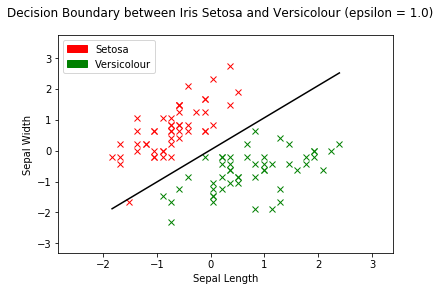

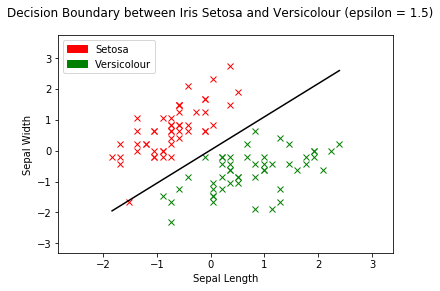

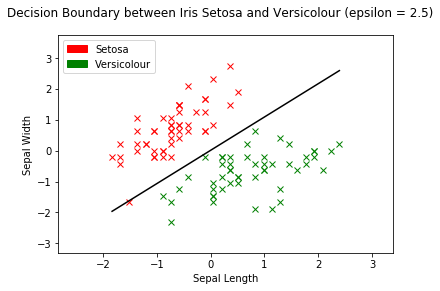

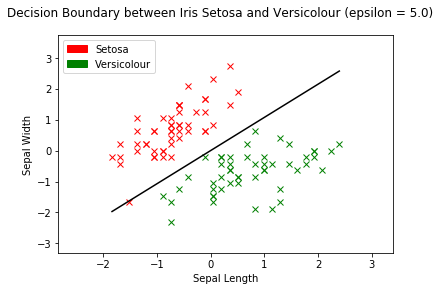

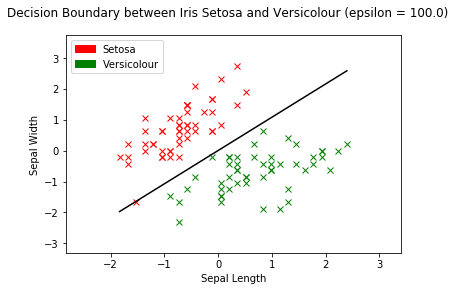

In [44]:
# Effects of huber loss while varying epsilon 
epsilons = np.array([1, 1.5, 2.5, 5])
for i in range(0, len(epsilons)):
    huberEst = SGDClassifier(loss="huber", penalty="none",\
        max_iter=10000, shuffle=True, tol=None, learning_rate="constant",\
        eta0=0.01, epsilon=epsilons[i])
    huberEst.fit(scaledXRed, yRed)
    plotDecisionBinary(huberEst, scaledXRed[:,0], scaledXRed[:,1], yRed, "Sepal Length", "Sepal Width",\
        "Decision Boundary between Iris Setosa and Versicolour (epsilon = " + str(epsilons[i]) + ")")

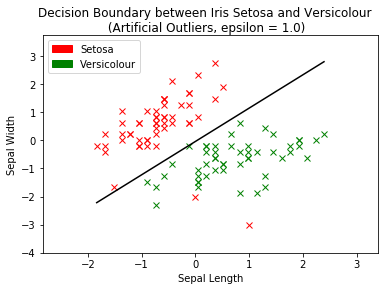

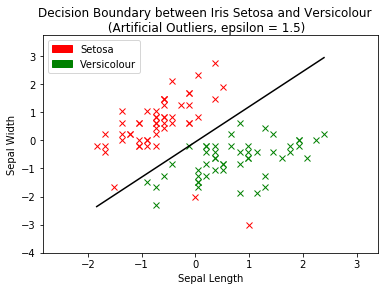

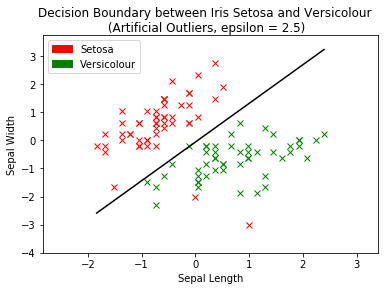

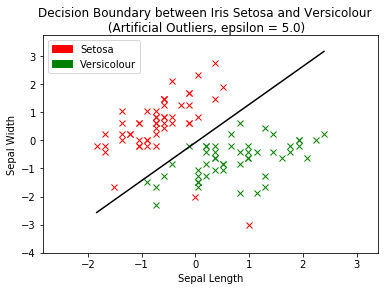

In [69]:
# Effects of huber loss while varying epsilon 
# With artificial outliers 
XRedWithArtificial = np.append(scaledXRed,\
        [[0,-2],[1,-3]],axis=0)
yRedWithArtificial = np.append(yRed,[0,0])

# epsilons already defined
for i in range(0, len(epsilons)):
    huberEst = SGDClassifier(loss="huber", penalty="none",\
        max_iter=1000, shuffle=True, tol=None, learning_rate="constant",\
        eta0=0.01, epsilon=epsilons[i])
    huberEst.fit(XRedWithArtificial, yRedWithArtificial)
    plotDecisionBinary(huberEst, XRedWithArtificial[:,0],\
        XRedWithArtificial[:,1], yRedWithArtificial, "Sepal Length", "Sepal Width",\
        "Decision Boundary between Iris Setosa and Versicolour\n (Artificial Outliers, epsilon = " + str(epsilons[i]) + ")")

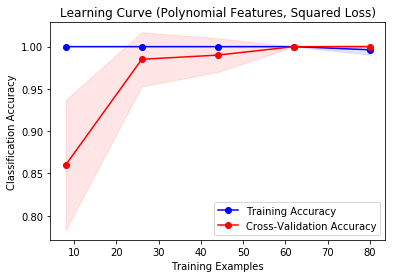

In [29]:
# Polynomial Feature Expansion (Reduced Model)
polyRed = PolynomialFeatures(2)
polyXRed = polyRed.fit_transform(scaledXRed)
# Basic Square Loss Model 
# A Basic Linear Classifier 
estimatorPolyRed = SGDClassifier(loss="squared_loss", penalty="none",\
    max_iter=10000, shuffle=True, tol=None, learning_rate="constant",\
    eta0=0.01)
# Random permutation cross-validator
cv = ShuffleSplit(n_splits=10, test_size=0.20)
# Learning curve 
trainSizes, trainScores, testScores = learning_curve(\
    estimatorPolyRed, polyXRed, yRed, train_sizes=np.linspace(0.1,1.0,5),\
    cv=cv, scoring="accuracy")

trainScoresMean = np.mean(trainScores, axis=1)
testScoresMean = np.mean(testScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
testScoresStd = np.std(testScores, axis=1)

generateGraph(trainSizes, trainScoresMean, testScoresMean,\
    trainScoresStd, testScoresStd,\
    "Training Examples", "Classification Accuracy",\
    "Learning Curve (Polynomial Features, Squared Loss)")

In [4]:
# Scale inputs (Now for analysis on linear model trained on entire Iris dataset)
scaledX = scale(X)

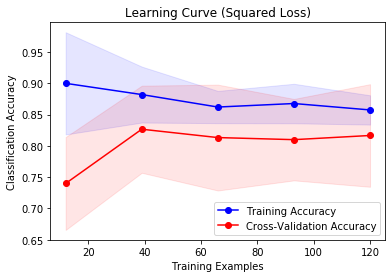

In [36]:
# A Basic Linear Classifier 
estimator = SGDClassifier(loss="squared_loss", penalty="none",\
    max_iter=10000, shuffle=True, tol=None, learning_rate="constant",\
    eta0=0.01)
# Random permutation cross-validator
cv = ShuffleSplit(n_splits=10, test_size=0.20)
# Learning curve 
trainSizes, trainScores, testScores = learning_curve(\
    estimator, scaledX, y, train_sizes=np.linspace(0.1,1.0,5),\
    cv=cv, scoring="accuracy")

trainScoresMean = np.mean(trainScores, axis=1)
testScoresMean = np.mean(testScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
testScoresStd = np.std(testScores, axis=1)

generateGraph(trainSizes, trainScoresMean, testScoresMean,\
    trainScoresStd, testScoresStd,\
    "Training Examples", "Classification Accuracy",\
    "Learning Curve (Squared Loss)")

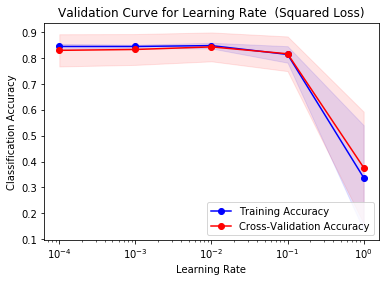

In [7]:
# Comment: Method of selecting a learning rate for the basic
# linear model. Use a validation curve, varying the learning
# rate.

# Determine ideal learning rate
learningRates = np.logspace(-4,0,5)
trainScores, testScores = validation_curve(estimator, scaledX, y,\
    "eta0", learningRates, cv=cv)

trainScoresMean = np.mean(trainScores, axis=1)
testScoresMean = np.mean(testScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
testScoresStd = np.std(testScores, axis=1)

generateGraph(learningRates, trainScoresMean, testScoresMean,\
    trainScoresStd, testScoresStd,\
    "Learning Rate", "Classification Accuracy",\
    "Validation Curve for Learning Rate  (Squared Loss)", True)

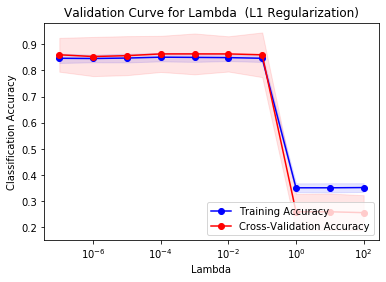

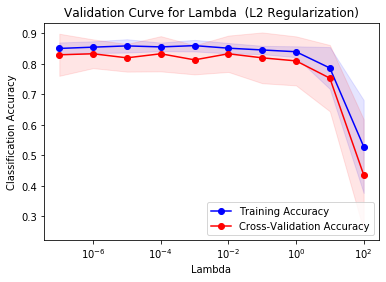

In [8]:
# L1 and L2 regularization
# Determine optimal lambda value
# Set of lamba values to test 
alphas = np.logspace(-7,2,10)

# L1 regularization
l1Estimator = SGDClassifier(loss="squared_loss", penalty="l1",\
    max_iter=10000, shuffle=True, tol=None, learning_rate="constant",\
    eta0=0.01)
# Use the same cross validation method (cv)
# Calculate validation curve
trainScores, testScores = validation_curve(l1Estimator, scaledX, y,\
    "alpha", alphas, cv=cv)

trainScoresMean = np.mean(trainScores, axis=1)
testScoresMean = np.mean(testScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
testScoresStd = np.std(testScores, axis=1)

# Graph
generateGraph(alphas, trainScoresMean, testScoresMean,\
    trainScoresStd, testScoresStd,\
    "Lambda", "Classification Accuracy",\
    "Validation Curve for Lambda  (L1 Regularization)", True)

# L1 regularization
l2Estimator = SGDClassifier(loss="squared_loss", penalty="l2",\
    max_iter=10000, shuffle=True, tol=None, learning_rate="constant",\
    eta0=0.01)
# Use the same cross validation method (cv)
# Calculate validation curve
trainScores, testScores = validation_curve(l2Estimator, scaledX, y,\
    "alpha", alphas, cv=cv)

trainScoresMean = np.mean(trainScores, axis=1)
testScoresMean = np.mean(testScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
testScoresStd = np.std(testScores, axis=1)

# Graph
generateGraph(alphas, trainScoresMean, testScoresMean,\
    trainScoresStd, testScoresStd,\
    "Lambda", "Classification Accuracy",\
    "Validation Curve for Lambda  (L2 Regularization)", True)

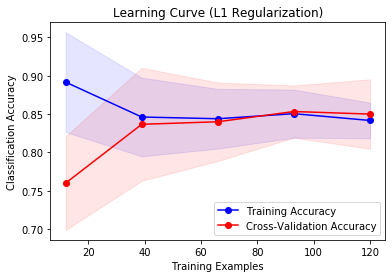

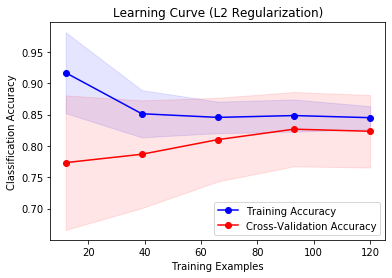

In [39]:
# Plot learning curves with L1 and L2 regularization 
# L1 
l1EstimatorOptimal = SGDClassifier(loss="squared_loss", penalty="l1",\
    max_iter=10000, shuffle=True, tol=None, learning_rate="constant",\
    eta0=0.01, alpha=0.1)
trainSizes, trainScores, testScores = learning_curve(\
    l1EstimatorOptimal, scaledX, y, train_sizes=np.linspace(0.1,1.0,5),\
    cv=cv, scoring="accuracy")

trainScoresMean = np.mean(trainScores, axis=1)
testScoresMean = np.mean(testScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
testScoresStd = np.std(testScores, axis=1)

generateGraph(trainSizes, trainScoresMean, testScoresMean,\
    trainScoresStd, testScoresStd,\
    "Training Examples", "Classification Accuracy",\
    "Learning Curve (L1 Regularization)")

# L2 
l2EstimatorOptimal = SGDClassifier(loss="squared_loss", penalty="l2",\
    max_iter=10000, shuffle=True, tol=None, learning_rate="constant",\
    eta0=0.01, alpha=0.1)
trainSizes, trainScores, testScores = learning_curve(\
    l2EstimatorOptimal, scaledX, y, train_sizes=np.linspace(0.1,1.0,5),\
    cv=cv, scoring="accuracy")

trainScoresMean = np.mean(trainScores, axis=1)
testScoresMean = np.mean(testScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
testScoresStd = np.std(testScores, axis=1)

generateGraph(trainSizes, trainScoresMean, testScoresMean,\
    trainScoresStd, testScoresStd,\
    "Training Examples", "Classification Accuracy",\
    "Learning Curve (L2 Regularization)")

Text(0.5, 1.0, 'Weights against Lamba (L2 Regularization)')

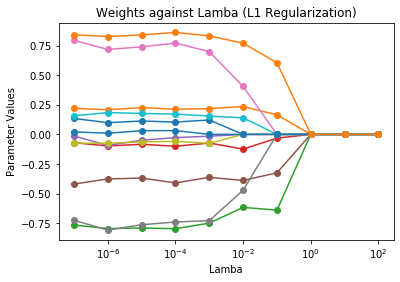

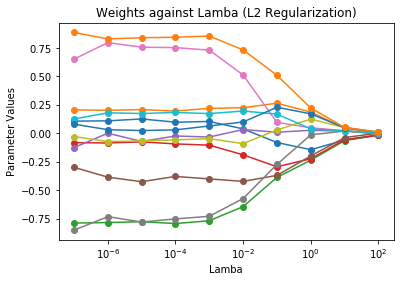

In [10]:
# Plotting the weights of the regularized models 
# lambas to test: alphas
numWeights = 12 

# L1
weights = np.zeros((alphas.shape[0], numWeights))
for i in range(0,alphas.shape[0]): 
    l1EstVaryAlph = SGDClassifier(loss="squared_loss", penalty="l1",\
        max_iter=10000, shuffle=True, tol=None, learning_rate="constant",\
        eta0=0.01, alpha=alphas[i])
    l1EstVaryAlph.fit(scaledX, y)
    weights[i,:]= l1EstVaryAlph.coef_.flatten()
plt.figure()
plt.semilogx(alphas, weights, '-o')
plt.xlabel("Lamba")
plt.ylabel("Parameter Values")
plt.title("Weights against Lamba (L1 Regularization)")

# L2 
weights = np.zeros((alphas.shape[0], numWeights))
for i in range(0,alphas.shape[0]): 
    l2EstVaryAlph = SGDClassifier(loss="squared_loss", penalty="l2",\
        max_iter=10000, shuffle=True, tol=None, learning_rate="constant",\
        eta0=0.01, alpha=alphas[i])
    l2EstVaryAlph.fit(scaledX, y)
    weights[i,:]= l2EstVaryAlph.coef_.flatten()
plt.figure()
plt.semilogx(alphas, weights, '-o')
plt.xlabel("Lamba")
plt.ylabel("Parameter Values")
plt.title("Weights against Lamba (L2 Regularization)")

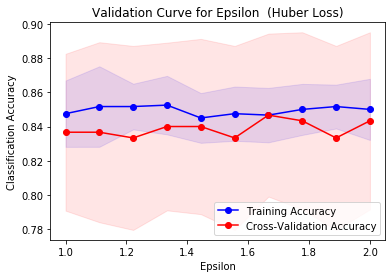

In [11]:
# Investigating Huber Loss 
# Determine effects of varying epsilon
epsilons = np.linspace(1, 2, 10)

# Huber loss estimator 
huberEst = SGDClassifier(loss="huber", penalty="none",\
    max_iter=10000, shuffle=True, tol=None, learning_rate="constant",\
    eta0=0.01)

# Use the same cross validation method (cv)
# Calculate validation curve
trainScores, testScores = validation_curve(huberEst, scaledX, y,\
    "epsilon", epsilons, cv=cv)

trainScoresMean = np.mean(trainScores, axis=1)
testScoresMean = np.mean(testScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
testScoresStd = np.std(testScores, axis=1)

# Graph
generateGraph(epsilons, trainScoresMean, testScoresMean,\
    trainScoresStd, testScoresStd,\
    "Epsilon", "Classification Accuracy",\
    "Validation Curve for Epsilon  (Huber Loss)", False)

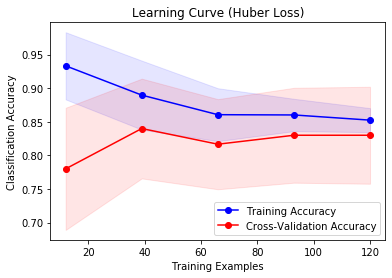

In [12]:
# Learning curve for Huber Loss with default sklearn 
# settings: epsilon = 1.35 
# Huber loss estimator 
huberEst = SGDClassifier(loss="huber", penalty="none",\
    max_iter=10000, shuffle=True, tol=None, learning_rate="constant",\
    eta0=0.01, epsilon=1.35)

trainSizes, trainScores, testScores = learning_curve(\
    huberEst, scaledX, y, train_sizes=np.linspace(0.1,1.0,5),\
    cv=cv, scoring="accuracy")

trainScoresMean = np.mean(trainScores, axis=1)
testScoresMean = np.mean(testScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
testScoresStd = np.std(testScores, axis=1)

generateGraph(trainSizes, trainScoresMean, testScoresMean,\
    trainScoresStd, testScoresStd,\
    "Training Examples", "Classification Accuracy",\
    "Learning Curve (Huber Loss)")


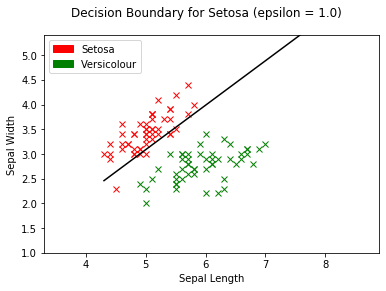

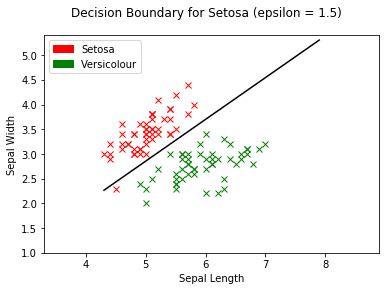

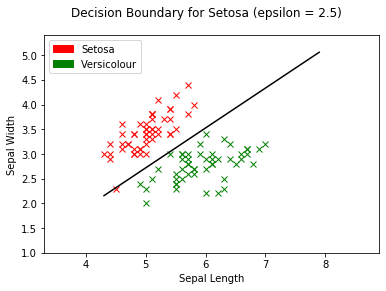

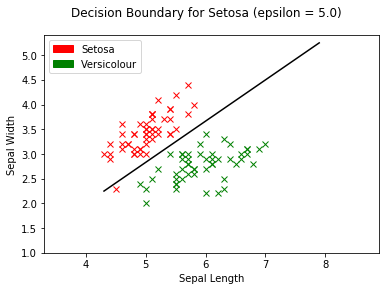

In [51]:
# Idea: Attempt to visualize decision boundaries
# of model on a subset of the features (2 features so can be visualized)
def plotHuberExcludeVirginica(targetClass, xFeature, yFeature, xFeatureName, yFeatureName, title):
    # Training parameters for classifying target class 1 (Setosa) 
    coefs = huberEst.coef_[targetClass]
    w0  = huberEst.intercept_[targetClass]
    w1 = coefs[0]
    w2 = coefs[1]
    intercept = - w0 / w2 
    slope = - w1 / w2 
    # Get line boundaries 
    lineXMin = np.amin(X[:,xFeature])
    lineXMax = np.amax(X[:,xFeature])
    lineX = np.linspace(lineXMin, lineXMax)
    lineY = slope * lineX + intercept
    # Plot points 
    plt.figure()
    for i in range(0,X[:100].shape[0]):
        plt.plot(X[i,xFeature], X[i,yFeature], "x", color=colors[y[i]])
    plt.plot(lineX, lineY, 'k')
    plt.xlim(lineXMin - 1, lineXMax + 1)
    # Set window y boundaries 
    lineYMin = np.amin(X[:,yFeature])
    lineYMax = np.amax(X[:,yFeature])
    plt.ylim(lineYMin - 1, lineYMax + 1)
    plt.xlabel(xFeatureName)
    plt.ylabel(yFeatureName)
    plt.suptitle(title)
    legendElements = [\
    Patch(facecolor=colors[0], edgecolor=colors[0],\
         label=labels[0]),\
    Patch(facecolor=colors[1], edgecolor=colors[1],\
         label=labels[1]),
    ]
    plt.legend(handles=legendElements)

epsilons = np.array([1, 1.5, 2.5, 5])
for i in range(0, len(epsilons)):
    huberEst = SGDClassifier(loss="huber", penalty="none",\
        max_iter=10000, shuffle=True, tol=None, learning_rate="constant",\
        eta0=0.01, epsilon=epsilons[i])
    huberEst.fit(X[:100,0:2],y[:100])
    plotHuberExcludeVirginica(0, 0, 1, "Sepal Length", "Sepal Width",\
        "Decision Boundary for Setosa (epsilon = " + str(epsilons[i]) + ")")

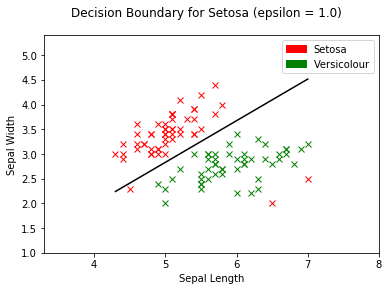

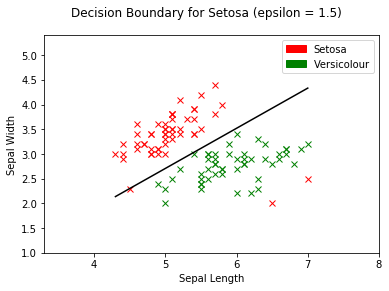

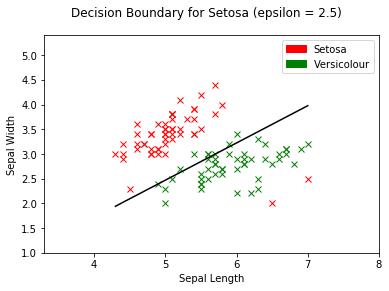

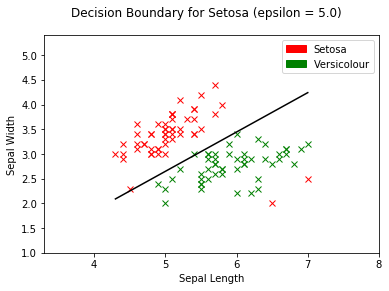

In [53]:
# Idea: Attempt to visualize decision boundaries
# of model on a subset of the features (2 features so can be visualized)
def plotHuberExcludeVirginica(targetClass, xFeature, yFeature, xFeatureName, yFeatureName, title,\
                             xPoints, yPoints):
    # Training parameters for classifying target class 1 (Setosa) 
    coefs = huberEst.coef_[targetClass]
    w0  = huberEst.intercept_[targetClass]
    w1 = coefs[0]
    w2 = coefs[1]
    intercept = - w0 / w2 
    slope = - w1 / w2 
    # Get line boundaries 
    lineXMin = np.amin(xPoints[:,xFeature])
    lineXMax = np.amax(xPoints[:,xFeature])
    lineX = np.linspace(lineXMin, lineXMax)
    lineY = slope * lineX + intercept
    # Plot points 
    plt.figure()
    for i in range(0,xPoints[:].shape[0]):
        plt.plot(xPoints[i,xFeature], xPoints[i,yFeature], "x", color=colors[yPoints[i]])
    plt.plot(lineX, lineY, 'k')
    plt.xlim(lineXMin - 1, lineXMax + 1)
    # Set window y boundaries 
    lineYMin = np.amin(xPoints[:,yFeature])
    lineYMax = np.amax(xPoints[:,yFeature])
    plt.ylim(lineYMin - 1, lineYMax + 1)
    plt.xlabel(xFeatureName)
    plt.ylabel(yFeatureName)
    plt.suptitle(title)
    legendElements = [\
    Patch(facecolor=colors[0], edgecolor=colors[0],\
         label=labels[0]),\
    Patch(facecolor=colors[1], edgecolor=colors[1],\
         label=labels[1]),
    ]
    plt.legend(handles=legendElements)

epsilons = np.array([1, 1.5, 2.5, 5])
for i in range(0, len(epsilons)):
    huberEst = SGDClassifier(loss="huber", penalty="none",\
        max_iter=10000, shuffle=True, tol=None, learning_rate="constant",\
        eta0=0.01, epsilon=epsilons[i])
    xArtificial = X[:100,0:2]
    xArtificial = np.append(xArtificial, [[7.0, 2.5],[6.5,2.0]], axis=0)
    yArtificial = y[:100]
    yArtificial = np.append(yArtificial, [0,0])
    huberEst.fit(xArtificial, yArtificial)
    plotHuberExcludeVirginica(0, 0, 1, "Sepal Length", "Sepal Width",\
        "Decision Boundary for Setosa (epsilon = " + str(epsilons[i]) + ")",\
         xArtificial, yArtificial)

In [14]:
# Polynomial Feature Expansion
poly = PolynomialFeatures(2)
polyX = poly.fit_transform(scaledX)

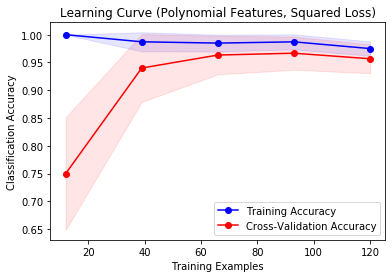

In [40]:
# Basic Square Loss Model 
# A Basic Linear Classifier 
estimatorPoly = SGDClassifier(loss="squared_loss", penalty="none",\
    max_iter=10000, shuffle=True, tol=None, learning_rate="constant",\
    eta0=0.01)
# Random permutation cross-validator
cv = ShuffleSplit(n_splits=10, test_size=0.20)
# Learning curve 
trainSizes, trainScores, testScores = learning_curve(\
    estimatorPoly, polyX, y, train_sizes=np.linspace(0.1,1.0,5),\
    cv=cv, scoring="accuracy")

trainScoresMean = np.mean(trainScores, axis=1)
testScoresMean = np.mean(testScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
testScoresStd = np.std(testScores, axis=1)

generateGraph(trainSizes, trainScoresMean, testScoresMean,\
    trainScoresStd, testScoresStd,\
    "Training Examples", "Classification Accuracy",\
    "Learning Curve (Polynomial Features, Squared Loss)")

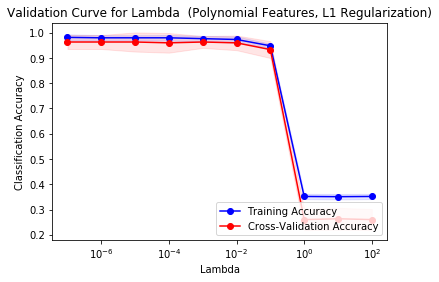

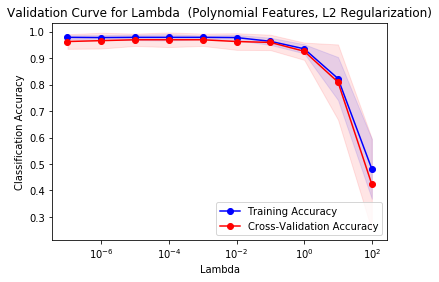

In [16]:
# L1 and L2 regularization
# Determine optimal lambda value
# Set of lamba values to test 
alphas = np.logspace(-7,2,10)

# L1 regularization
l1EstimatorPoly = SGDClassifier(loss="squared_loss", penalty="l1",\
    max_iter=10000, shuffle=True, tol=None, learning_rate="constant",\
    eta0=0.01)
# Use the same cross validation method (cv)
# Calculate validation curve
trainScores, testScores = validation_curve(l1EstimatorPoly, polyX, y,\
    "alpha", alphas, cv=cv)

trainScoresMean = np.mean(trainScores, axis=1)
testScoresMean = np.mean(testScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
testScoresStd = np.std(testScores, axis=1)

# Graph
generateGraph(alphas, trainScoresMean, testScoresMean,\
    trainScoresStd, testScoresStd,\
    "Lambda", "Classification Accuracy",\
    "Validation Curve for Lambda  (Polynomial Features, L1 Regularization)", True)

# L1 regularization
l2EstimatorPoly = SGDClassifier(loss="squared_loss", penalty="l2",\
    max_iter=10000, shuffle=True, tol=None, learning_rate="constant",\
    eta0=0.01)
# Use the same cross validation method (cv)
# Calculate validation curve
trainScores, testScores = validation_curve(l2EstimatorPoly, polyX, y,\
    "alpha", alphas, cv=cv)

trainScoresMean = np.mean(trainScores, axis=1)
testScoresMean = np.mean(testScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
testScoresStd = np.std(testScores, axis=1)

# Graph
generateGraph(alphas, trainScoresMean, testScoresMean,\
    trainScoresStd, testScoresStd,\
    "Lambda", "Classification Accuracy",\
    "Validation Curve for Lambda  (Polynomial Features, L2 Regularization)", True)

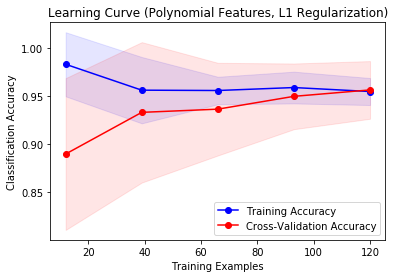

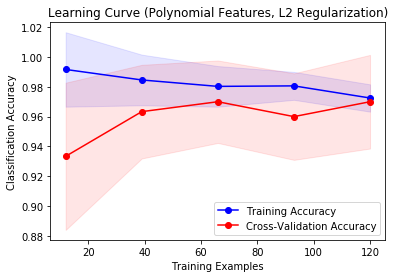

In [17]:
# Plot learning curves with L1 and L2 regularization 
# L1 
l1EstimatorOptimalPoly = SGDClassifier(loss="squared_loss", penalty="l1",\
    max_iter=10000, shuffle=True, tol=None, learning_rate="constant",\
    eta0=0.01, alpha=0.1)
trainSizes, trainScores, testScores = learning_curve(\
    l1EstimatorOptimalPoly, polyX, y, train_sizes=np.linspace(0.1,1.0,5),\
    cv=cv, scoring="accuracy")

trainScoresMean = np.mean(trainScores, axis=1)
testScoresMean = np.mean(testScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
testScoresStd = np.std(testScores, axis=1)

generateGraph(trainSizes, trainScoresMean, testScoresMean,\
    trainScoresStd, testScoresStd,\
    "Training Examples", "Classification Accuracy",\
    "Learning Curve (Polynomial Features, L1 Regularization)")

# L2 
l2EstimatorOptimalPoly = SGDClassifier(loss="squared_loss", penalty="l2",\
    max_iter=10000, shuffle=True, tol=None, learning_rate="constant",\
    eta0=0.0001, alpha=0.01)
trainSizes, trainScores, testScores = learning_curve(\
    l2EstimatorOptimalPoly, polyX, y, train_sizes=np.linspace(0.1,1.0,5),\
    cv=cv, scoring="accuracy")

trainScoresMean = np.mean(trainScores, axis=1)
testScoresMean = np.mean(testScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
testScoresStd = np.std(testScores, axis=1)

generateGraph(trainSizes, trainScoresMean, testScoresMean,\
    trainScoresStd, testScoresStd,\
    "Training Examples", "Classification Accuracy",\
    "Learning Curve (Polynomial Features, L2 Regularization)")

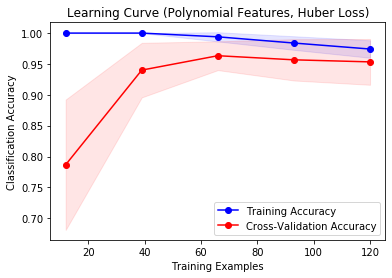

In [18]:
# Learning curve for Huber Loss with default sklearn 
# settings: epsilon = 1.35 
# Huber loss estimator 
huberEstPoly = SGDClassifier(loss="huber", penalty="none",\
    max_iter=10000, shuffle=True, tol=None, learning_rate="constant",\
    eta0=0.01, epsilon=1.35)

trainSizes, trainScores, testScores = learning_curve(\
    huberEstPoly, polyX, y, train_sizes=np.linspace(0.1,1.0,5),\
    cv=cv, scoring="accuracy")

trainScoresMean = np.mean(trainScores, axis=1)
testScoresMean = np.mean(testScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
testScoresStd = np.std(testScores, axis=1)

generateGraph(trainSizes, trainScoresMean, testScoresMean,\
    trainScoresStd, testScoresStd,\
    "Training Examples", "Classification Accuracy",\
    "Learning Curve (Polynomial Features, Huber Loss)")